In [27]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup

# API setup
API_KEY = '01215650-a96e-43d9-abe3-6b0f6ebfff33'
BASE_URL = 'https://content.guardianapis.com/search'

# Search criteria - declare keywords and date range
QUERY_KEYWORDS = "EV%20electric%20vehicle%20price%20cost" # EV electric vehicle price cost
FROM_DATE = "2023-10-01"  # 1 year period for relevancy
LIMIT_PER_CALL = 10  # Limit of articles per API request
TOTAL_ARTICLES = 250  # Total number of articles we want to retrieve
ARTICLE_COUNT = 0  # Counter for total articles retrieved

# Set up parameters for API request
params = {
    'api-key': API_KEY,
    'q': QUERY_KEYWORDS,
    'from-date': FROM_DATE,
    'page-size': LIMIT_PER_CALL,
    'order-by': 'newest',
    'show-fields': 'body',
    'format': 'json',
}

# Data collection
all_articles = []  # List to store the results
page = 1

while ARTICLE_COUNT < TOTAL_ARTICLES:
    params['page'] = page
    print(f'Retrieving page {page}, current count: {ARTICLE_COUNT}...')
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    # Check if response is successful
    if response.status_code != 200 or data['response']['status'] != 'ok':
        print(f"Error fetching data: {response.text}")
        break

    # Extract articles
    articles = data['response']['results']
    if not articles:
        print('No more articles found.')
        break

    # Store the relevant information from each article if it is of type "article"
    for article in articles:
        if article['type'] == 'article':
            body_html = article['fields'].get('body', '')
            # Use BeautifulSoup to clean HTML tags from the body and utf-8 encoding
            body_clean = BeautifulSoup(body_html, "html.parser").get_text().strip()
            body_clean = body_clean.encode('utf-8', errors='ignore').decode('utf-8')

            # Extract other fields
            web_title = article.get('webTitle', '')
            section_name = article.get('sectionName', '')
            pillar_name = article.get('pillarName', '')

            filtered_article = {
                'body': body_clean,
                'webTitle': web_title,
                'sectionName': section_name,
                'pillarName': pillar_name
            }
            all_articles.append(filtered_article)
            ARTICLE_COUNT += 1

            # Stop if we've collected enough articles
            if ARTICLE_COUNT >= TOTAL_ARTICLES:
                break

    # Increment the page count and sleep to respect rate limit (if needed)
    page += 1
    time.sleep(1)  # Pause for 1 second to avoid hitting the rate limit

# Convert data to a DataFrame
df = pd.DataFrame(all_articles)


Retrieving page 1, current count: 0...
Retrieving page 2, current count: 7...
Retrieving page 3, current count: 12...
Retrieving page 4, current count: 20...
Retrieving page 5, current count: 25...
Retrieving page 6, current count: 33...
Retrieving page 7, current count: 41...
Retrieving page 8, current count: 49...
Retrieving page 9, current count: 55...
Retrieving page 10, current count: 61...
Retrieving page 11, current count: 71...
Retrieving page 12, current count: 77...
Retrieving page 13, current count: 87...
Retrieving page 14, current count: 94...
Retrieving page 15, current count: 101...
Retrieving page 16, current count: 106...
Retrieving page 17, current count: 112...
Retrieving page 18, current count: 122...
Retrieving page 19, current count: 128...
Retrieving page 20, current count: 134...
Retrieving page 21, current count: 143...
Retrieving page 22, current count: 150...
Retrieving page 23, current count: 159...
Retrieving page 24, current count: 169...
Retrieving page 2

In [28]:
# File path to save the CSV
OUTPUT_FILE = r'C:\Users\david\Downloads\MidtermProject\Chui_David_Guardian_20241020.csv'

# Save to CSV
df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')
print(f"Data saved to {OUTPUT_FILE}")

Data saved to C:\Users\david\Downloads\MidtermProject\Chui_David_Guardian_20241020.csv


In [5]:
import pandas as pd

csv_file_name = 'C:/Users/david/Downloads/MidtermProject/Chui_David_Guardian_20241020.csv'

# Load the CSV into a DataFrame
df = pd.read_csv(csv_file_name)

# View the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Get the shape of the DataFrame
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# Get the list of columns
print("\nColumn names:")
print(df.columns)

# Get a summary of the dataset, including non-null values and data types
print("\nInfo about the dataset:")
print(df.info())

# Get basic statistics for numeric columns (if there are any)
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Check for missing values
print("\nCheck for missing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:
                                                body  \
0  For decades Germany has enjoyed a reputation a...   
1  The owner of the Vauxhall, Citroën and Peugeot...   
2  Earlier this year, a French experiment offered...   
3  “Tales of infanticide” is not what is happenin...   
4  A police department in California has purchase...   

                                            webTitle        sectionName  \
0        Is China cannibalising the EU car industry?           Business   
1  Vauxhall owner to make decision on future of U...           Business   
2  The Guardian view on Europe’s struggling EV in...            Opinion   
3                Dead children were no props in Gaza  From the Observer   
4  California police department debuts ‘first pol...         Technology   

  pillarName  
0       News  
1       News  
2    Opinion  
3       News  
4       News  

Shape of the dataset (rows, columns):
(238, 4)

Column names:
Index(['body', 'webTitle', 'se

In [6]:
## Most of my cleaning was taken care of prior to insertion into dataframe as the responses were parsed

import re

# Remove punctuation, numbers, and extra whitespace from the 'body' column
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply the cleaning function to relevant columns
df['body'] = df['body'].apply(clean_text)
df['webTitle'] = df['webTitle'].apply(clean_text)

# Verify cleaned text
print("First 5 rows after cleaning:")
print(df[['body', 'webTitle']].head())


First 5 rows after cleaning:
                                                body  \
0  For decades Germany has enjoyed a reputation a...   
1  The owner of the Vauxhall Citron and Peugeot b...   
2  Earlier this year a French experiment offered ...   
3  Tales of infanticide is not what is happening ...   
4  A police department in California has purchase...   

                                            webTitle  
0         Is China cannibalising the EU car industry  
1  Vauxhall owner to make decision on future of U...  
2  The Guardian view on Europes struggling EV ind...  
3                Dead children were no props in Gaza  
4  California police department debuts first poli...  


In [7]:
import pandas as pd
from nltk.corpus import stopwords
import re
import nltk

nltk.download('stopwords')

# The dataframe 'df' already has cleaned data

# Define function to filter relevant articles discussing electric vehicles (EV) and remove stopwords, single letters
def filter_and_clean_text(text):
    # Check if the article discusses electric vehicles (EV)
    keywords = ["electric vehicle", "EV", "electric car", "electric truck"]
    if not any(keyword.lower() in text.lower() for keyword in keywords):
        return None  # Return None if the article does not mention relevant keywords

    # Remove stopwords and single letters
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 1]

    return ' '.join(filtered_words)

# Apply the function to the body column to filter articles and remove stopwords
df['relevant_text'] = df['body'].apply(filter_and_clean_text)

# Drop rows where 'relevant_text' is None (i.e., articles that do not discuss EVs)
df = df.dropna(subset=['relevant_text'])

print("Relevant articles have been filtered and stopwords removed.")

# File path to save the CSV
OUTPUT_FILE = r'C:\Users\david\Downloads\MidtermProject\Chui_David_Guardian_Filtered_20241020.csv'

# Save to CSV
df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')
print(f"Data saved to {OUTPUT_FILE}")


Relevant articles have been filtered and stopwords removed.
Data saved to C:\Users\david\Downloads\MidtermProject\Chui_David_Guardian_Filtered_20241020.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


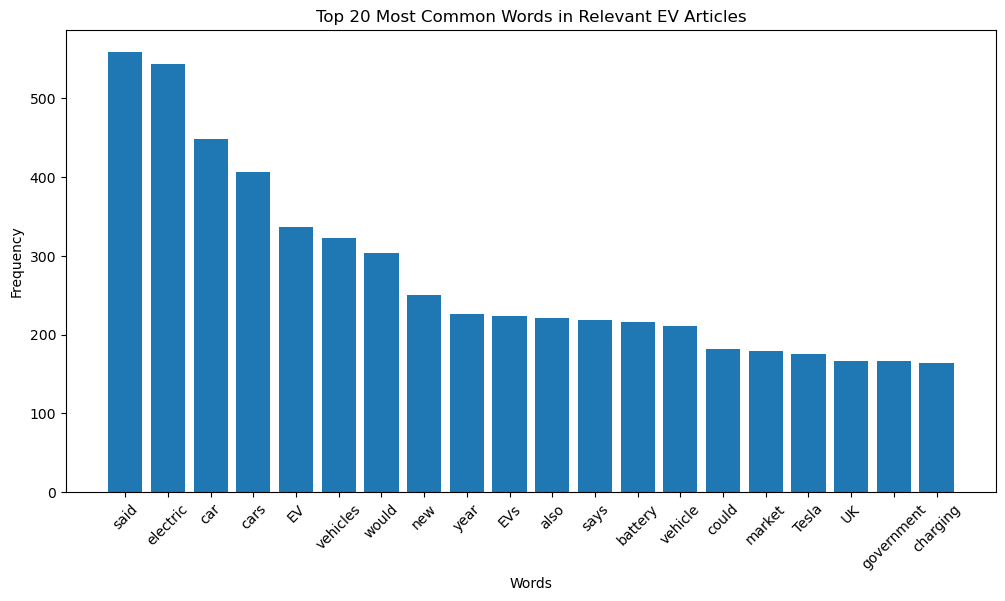

In [10]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# The dataframe 'df' already has cleaned data

# Keyword in Context (KWIC) Analysis
# Define function to perform KWIC analysis
def kwic_analysis(text, keyword, window_size=10):
    tokens = word_tokenize(text)
    keyword_positions = [i for i, word in enumerate(tokens) if word.lower() == keyword.lower()]
    context_snippets = []
    
    for position in keyword_positions:
        start = max(0, position - window_size)
        end = min(len(tokens), position + window_size + 1)
        context = tokens[start:end]
        context_snippets.append(' '.join(context))
    
    return context_snippets

# KWIC analysis for the keywords "price" and "cost"
df['kwic_price'] = df['relevant_text'].apply(lambda x: kwic_analysis(x, 'price'))
df['kwic_cost'] = df['relevant_text'].apply(lambda x: kwic_analysis(x, 'cost'))

# Omit rows where neither 'price' nor 'cost' is included
df = df[(df['kwic_price'].apply(lambda x: len(x) > 0)) | (df['kwic_cost'].apply(lambda x: len(x) > 0))]

# Word Frequency Analysis
all_text = ' '.join(df['relevant_text'])
tokens = word_tokenize(all_text)
word_freq = Counter(tokens)

# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Plot the word frequencies
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Relevant EV Articles')
plt.xticks(rotation=45)
plt.show()

In [13]:
import pandas as pd
from nltk.tokenize import word_tokenize

# The dataframe 'df' already has cleaned data and stopwords removed

# Keyword in Context (KWIC) Analysis
# Define function to perform KWIC analysis
def kwic_analysis(text, keyword, window_size=10):
    tokens = word_tokenize(text)
    keyword_positions = [i for i, word in enumerate(tokens) if word.lower() == keyword.lower()]
    context_snippets = []
    
    for position in keyword_positions:
        start = max(0, position - window_size)
        end = min(len(tokens), position + window_size + 1)
        context = tokens[start:end]
        context_snippets.append(' '.join(context))
    
    return context_snippets

# KWIC analysis for the keywords "price" and "cost"
df['kwic_price'] = df['relevant_text'].apply(lambda x: kwic_analysis(x, 'price'))
df['kwic_cost'] = df['relevant_text'].apply(lambda x: kwic_analysis(x, 'cost'))

# Omit rows where neither 'price' nor 'cost' is included
df = df[(df['kwic_price'].apply(lambda x: len(x) > 0)) | (df['kwic_cost'].apply(lambda x: len(x) > 0))]

# Display the KWIC analysis results for the first few articles
for index, row in df.iterrows():
    for snippet in row['kwic_price']:
        print(f"... {snippet} ...")
    for snippet in row['kwic_cost']:
        print(f"... {snippet} ...")

# File path to save the CSV
OUTPUT_FILE = r'C:\Users\david\Downloads\MidtermProject\Chui_David_Guardian_KWIC.csv'

# Save to CSV
df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')
print(f"Data saved to {OUTPUT_FILE}")


... models seek overseas EV sales offset weak home market vicious price war Meanwhile European car brands rushing work Chinese rivals threatening ...
... Hungary Chinese carmakers go Germany France Italy build cars would cost disadvantages starting energy costs said EU proposing extra tariffs Chinese ...
... spell danger rivals troubled Volkswagen Politicians stay away tariffs adding cost auto manufacturing confusing auto industry said Li Speaking alongside European ...
... first time companys history Along cost living crisis relatively high price EVs big part problem competition China State subsidies access essential ...
... declared intention close domestic factories first time companys history Along cost living crisis relatively high price EVs big part problem competition ...
... destinyOmar SarhanLeeds Put brake boozing England urged bring minimum unit price alcohol deaths rise year prevention takes many forms public health ...
... still rising society encourage driving car without